In [14]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from scipy import stats
import itertools
with open(r"C:\Users\DAVID SEO\Desktop\data_practice\USvideos.csv\US_category_id.json") as json_file:
    json_data=json.load(json_file)
print(json_data)





{'kind': 'youtube#videoCategoryListResponse', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"', 'items': [{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}, {'kind': 'yout

In [15]:
'''
items ranging from 0 to 31 
json_data['items'][31]['id'] ##id
json_data['items'][31]['snippet']['title'] ##title 

'''
title=dict() # creating the dictionary object
for j in range(32): 
    idx=json_data['items'][j]['id'] # storing id as a key
    title[idx]=json_data['items'][j]['snippet']['title'] #storing title as values

title 

        


{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [16]:
data=pd.read_csv(r"C:\Users\DAVID SEO\Desktop\data_practice\USvideos.csv\USvideos.csv")
data['category_title']=data['category_id'].apply(lambda x:title[str(x)]) #Creating a title 


In [17]:
data.isnull().any()
data=data.fillna('') #replacing '' with Null values


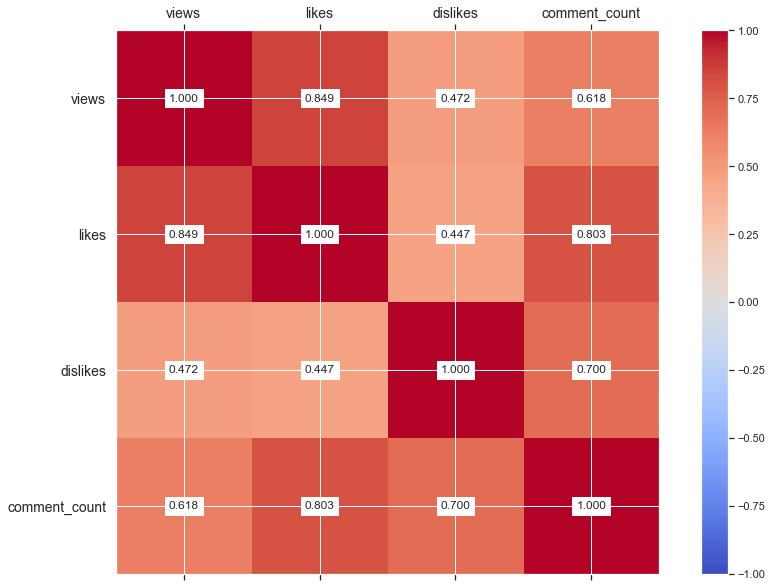

In [52]:
sns.set()
data.head()
df_num=data.iloc[:,7:11]
corr=df_num.corr()
fig,ax=plt.subplots(figsize=(15,10))
cat=ax.matshow(corr,cmap='coolwarm',vmin=-1,vmax=1)
fig.colorbar(cat)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(labels=df_num.columns,fontsize=14)
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(labels=df_num.columns,fontsize=14)
for i in range(4):
    for j in range(4):
        ax.text(i,j,'{:.3f}'.format(corr.iloc[i,j]),ha='center',va='center',bbox=dict(facecolor='white'))

### Comment
 To determine whether the correlation between two selected variables are either statistically significant or by chance, we need to perform correlation analysis.  Many types are existing to check out its linear relations most of which are parametric tests that require that variables are following the normal distribution. 

First of all, make sure if variables are satisfying the normality. If the are,
 proceed with the parametric test. If they are not, then go for a nonparametric one.

## correlation

### Tests for normality

- Qunatile

- QQplot

- Shapiro test (We will skip Shapiro test since test for data with a size greater than 5000 could produce inaccurate p-value.)

- Kolomogrove Sminorve Test

- skewness and Kurtosis
  (Even if these tests are not for normality, it is always a good practice to chek for the level of asymmetric and availability of 
   outliers)



#### 1. Quantile



In [80]:
import chart_studio.plotly as py
labels=df_num.columns
tables=[['category','1%','25%','50%','75%','99%']]
for i,z in enumerate(labels):
    quantile=np.quantile(df_num.iloc[:,i],[0.01,0.25,0.5,0.75,0.99])
    quantile=list(itertools.chain.from_iterable([[z],quantile]))
    tables.append(quantile)

tables=ff.create_table(tables)


#### comment

From the table, each categy has a heavy right tail which telss thta there is a larger possiblity of getting larger valeus. Take a
look at how huge differecen exits between 75%(third quartile) and 99% across four categories. The disribution of each set is positively skewed ,spreading to the right of the mean with  a hevy right tail. 

#### 2. Desity Distribution

Text(0.5, 1.0, 'Density Distribution For comment_count')

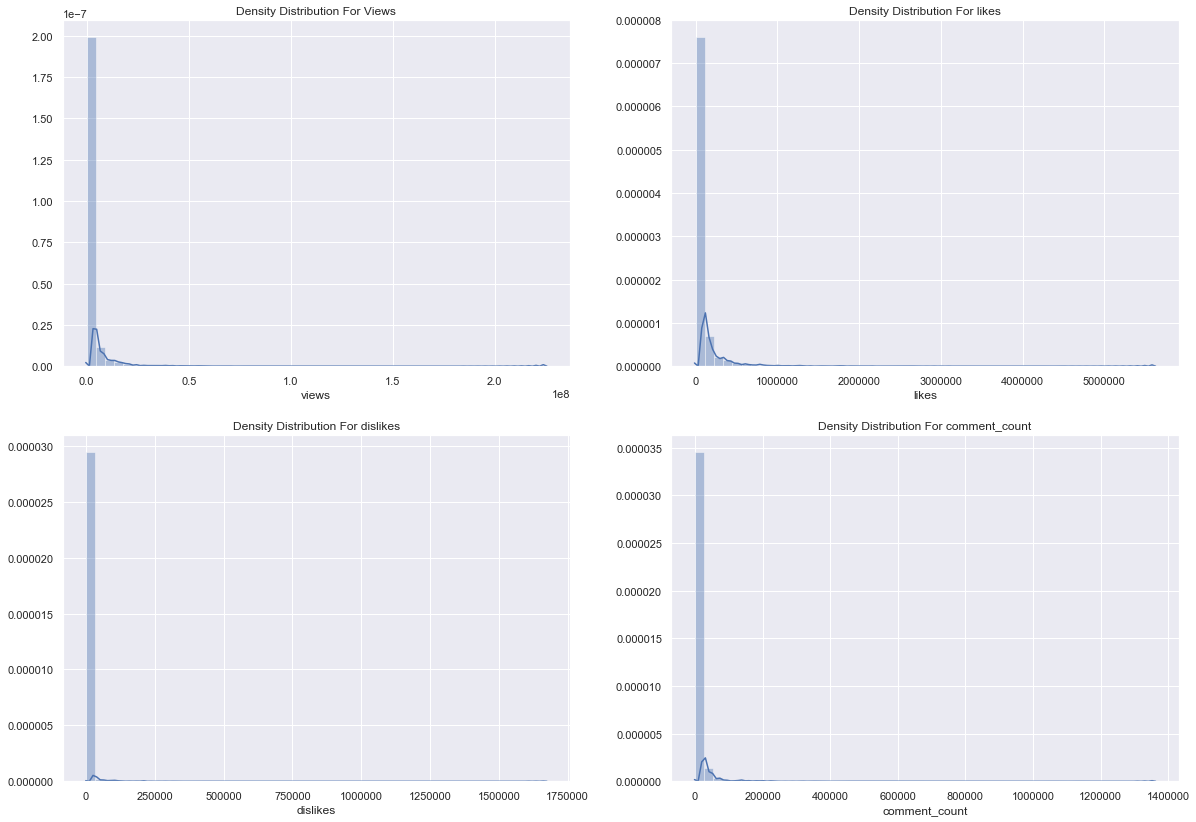

In [81]:

sns.set()

fig,ax=plt.subplots(2,2,figsize=(20,14))

sns.distplot(df_num.iloc[:,0],ax=ax[0,0])
ax[0,0].set_title("Density Distribution For Views")

sns.distplot(df_num.iloc[:,1],ax=ax[0,1])
ax[0,1].set_title("Density Distribution For likes")

sns.distplot(df_num.iloc[:,2],ax=ax[1,0])
ax[1,0].set_title("Density Distribution For dislikes")

sns.distplot(df_num.iloc[:,3],ax=ax[1,1])
ax[1,1].set_title("Density Distribution For comment_count")



3. qqplot

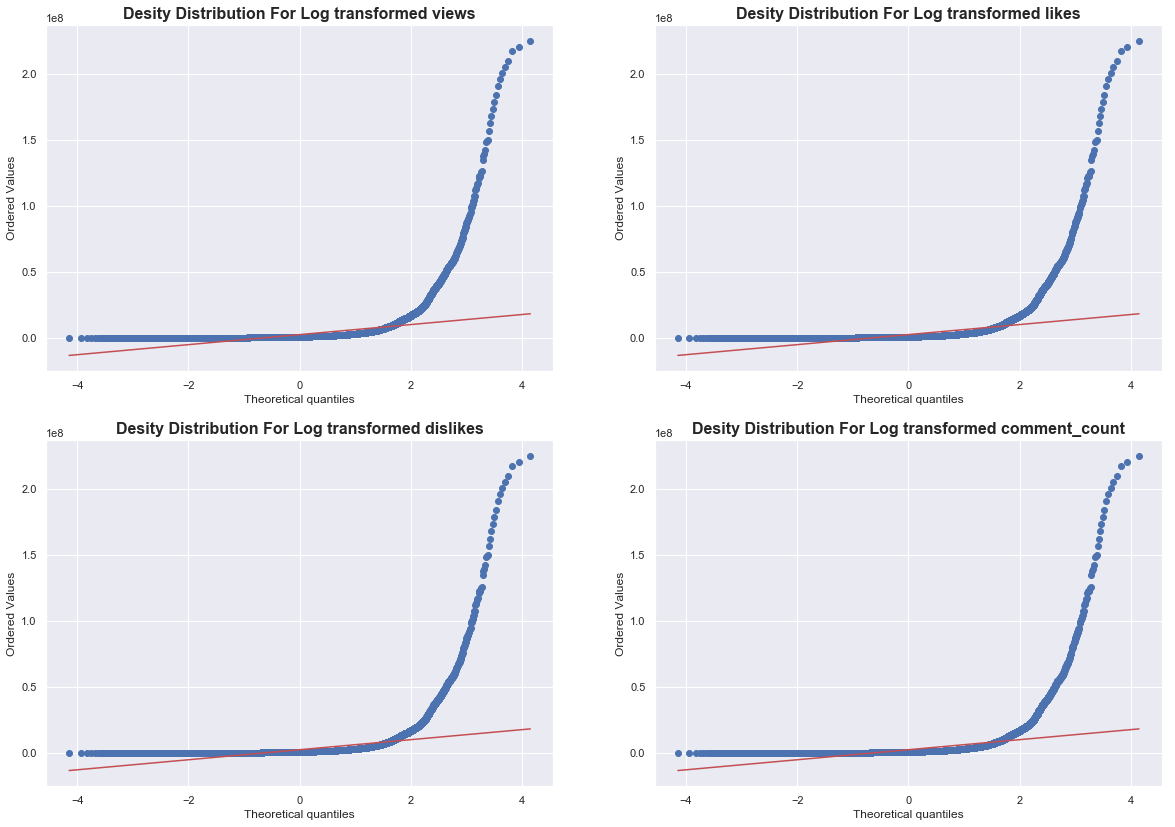

In [82]:
fig,ax=plt.subplots(2,2,figsize=(20,14))
for i,j in enumerate(labels):
        if i<=1:
            stats.probplot(df_num.iloc[:,0],plot=ax[i//2,i],dist='norm')
            ax[i//2,i].set_title("Desity Distribution For Log transformed {0}".format(j),fontsize=16,fontweight='bold')
        else:
             stats.probplot(df_num.iloc[:,0],plot=ax[i//2,i-2],dist='norm')
             ax[i//2,i-2].set_title("Desity Distribution For Log transformed {0}".format(j),fontsize=16,fontweight='bold') 

#### comment:

The larger values are dispersed further above the linear line,  which indicates that the distribution is more extreme than would be under the normal distribution. Also, slightly located above the line, the smaller values are not spread out to the left as much as would be expected to under normality condition. These phenomena can make us infer that the distribution of the data is right-skewed.


 4. Various types of tests


In [83]:
labels=df_num.columns
def table_result(x,test_name,labels):
    tables=[['Category','Test Name','Siginificance Level','Statics','p_value','comment']]
    alpha=0.05
    for i,j in enumerate(labels):
            if test_name=='shapiro':
                stat,p_value=stats.shapiro(x.iloc[:,i])
            elif test_name=='ks':
                stat,p_value=stats.kstest(x.iloc[:,i],'norm')
            elif test_name=='skewness':
                stat,p_value=stats.skewtest(x.iloc[:,i])
            elif test_name=='kurtosis':
                stat,p_value=stats.kurtosistest(x.iloc[:,i])
            elif test_name=='normaltest':
                stat,p_value=stats.normaltest(x.iloc[:,i])
            else:
                try:
                    ex=ValueError()
                    ex.msg='No such function exits'
                    raise ex
                except ValueError as e:
                    print('ValuerErorr:',e.msg)
                    
            if p_value>alpha:
                comment='Fail to Reject Null'
            else:
                comment='Reject Null'
            result=[j,test_name,alpha,round(stat,3),round(p_value,6),comment]
            tables.append(result)
    return tables
table_dp=table_result(df_num,'normaltest',labels)
table_ks=table_result(df_num,'ks',labels)
table_skewness=table_result(df_num,'skewness',labels)
table_kurtosis=table_result(df_num,'kurtosis',labels)


In [84]:

#D'agostino Pearson Test
table_dp=ff.create_table(table_dp)
table_dp.show()

In [85]:
# Kolomogrove Sminorve Test
table_ks=ff.create_table(table_ks)
table_ks.show()

In [86]:
#Skewness 
table_skewness=ff.create_table(table_skewness)
table_skewness.show()

In [87]:
table_kurtosis=ff.create_table(table_kurtosis)
table_kurtosis.show()

#### Comments


None of the categories shows that they are meeting the normality condition as the first two tests suggest that we should reject the null hypothesis (ie a given data set is following a normal distribution) at a significance level of 0.05. The rest of the tests also indicate the distribution is currently having a serious problem with sickness and outliers.  Therefore, we need to make a proper transformation of data to proceed with the correlation analysis. 

## trasnfomration 

x'=log(x+1) or nth root  is commonly used for the set of data that are right-skewed,but also includes zeros. Now, after transfomrtion,we need to check out if the transformed data meets the normality condition



### 1. Tests For  Normality 
  * Density Distriubtion
  
  * QQplot
  
  * Sharpio(we will skip this test)
  
  * D'Agostino-Pearson
 
  * Kolomogrove Sminorve test
  

1.1 Density Distribution

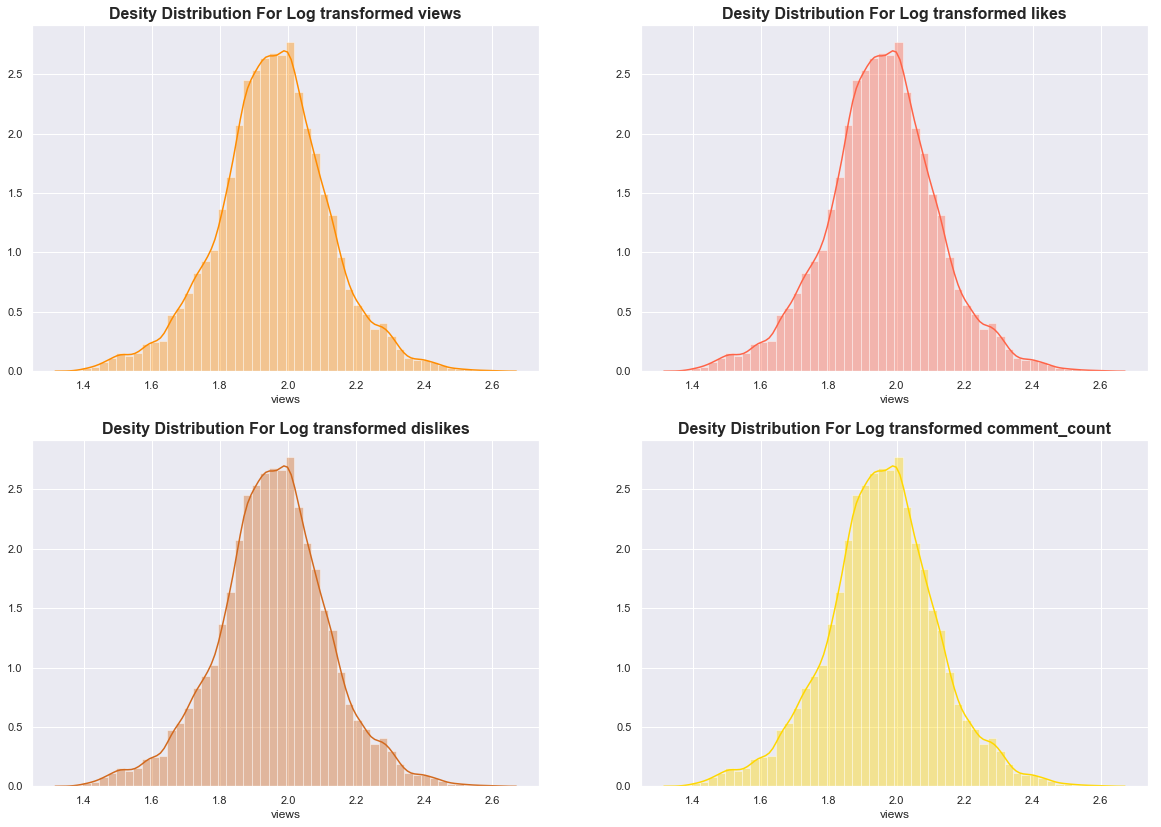

In [88]:
fig,ax=plt.subplots(2,2,figsize=(20,14))
labels=df_num.columns
color=['darkorange','tomato','chocolate','gold']
for i,j in enumerate(labels):
        if i<=1:
            sns.distplot(df_num.iloc[:,0].map(lambda x:x**(1/20)),ax=ax[i//2,i],color=color[i])
            ax[i//2,i].set_title("Desity Distribution For Log transformed {0}".format(j),fontsize=16,fontweight='bold')
        else:
             sns.distplot(df_num.iloc[:,0].map(lambda x:x**(1/20)),ax=ax[i//2,i-2],color=color[i])
             ax[i//2,i-2].set_title("Desity Distribution For Log transformed {0}".format(j),fontsize=16,fontweight='bold') 


1.2 QQ-plot

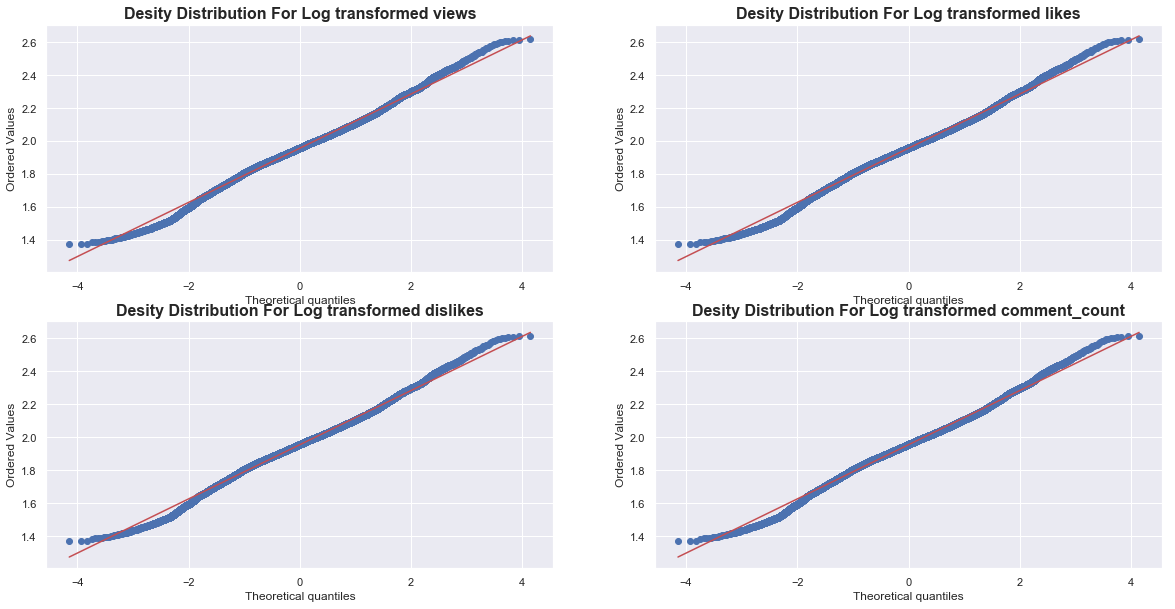

In [89]:
fig,ax=plt.subplots(2,2,figsize=(20,10))
for i,j in enumerate(labels):
        if i<=1:
            stats.probplot(df_num.iloc[:,0].map(lambda x:x**(1/20)),plot=ax[i//2,i],dist='norm')
            ax[i//2,i].set_title("Desity Distribution For Log transformed {0}".format(j),fontsize=16,fontweight='bold')
        else:
             stats.probplot(df_num.iloc[:,0].map(lambda x:x**(1/20)),plot=ax[i//2,i-2],dist='norm')
             ax[i//2,i-2].set_title("Desity Distribution For Log transformed {0}".format(j),fontsize=16,fontweight='bold') 

1.3 Kolomogrove Sminorve Test

In [90]:
df_transform=df_num.apply(lambda x:np.log(x+1),axis=1)
table_ap1=table_result(df_transform,'normaltest',labels)
table_ks1=table_result(df_transform,'ks',labels)
table_skewness1=table_result(df_transform,'skewness',labels)
table_kurtosis1=table_result(df_transform,'kurtosis',labels)




In [91]:
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']] 
# D'Agostino-Pearson test
ff.create_table(table_ap1,colorscale=colorscale).show()


In [92]:
# Komologrove Sminorve Test
ff.create_table(table_ks1,colorscale=colorscale).show()

In [93]:
#skewness
ff.create_table(table_skewness1,colorscale=colorscale).show()

In [94]:
#kurtosis
ff.create_table(table_kurtosis1,colorscale=colorscale).show()

### Comment
It is a (a bit strongly stated) fact that formal normality tests always reject on the huge sample sizes we work with today. It's even easy to prove that when n gets large, even the smallest deviation from perfect normality will lead to a significant result. And as every dataset has some degree of randomness, no single dataset will be a perfectly normally distributed sample. But in applied statistics the question is not whether the data/residuals ... are perfectly normal, but normal enough for the assumptions to hold.

### Correlation Analysis


In [95]:
result_table=[['Test Name','Counter Part','Correlation','Significance','p_value','Comment']]
alpha=0.05
labels=df_transform.columns
for i in range(1,4):
    test='Pearson'
    counter_part=labels[i]
    corr,p_value=stats.pearsonr(df_transform.iloc[:,0],df_transform.iloc[:,i])
    if p_value>alpha:
        comment='Fail to reject the null hypothesis'
    else:
        comment="Reject the null hypothesis"
    result_table.append([test,counter_part,corr,alpha,p_value,comment])

ff.create_table(result_table).show()   

## Confidence Interval for Correlation Coefficient



1. Calculate Correlation from one of three tests (pearson,kendall,spearman)



2. Convert the correlation to z' using Fisher's z's transform
   (This step is required if the sampling distriubtion of correltion is not normally distributed.)


![image](https://user-images.githubusercontent.com/53164959/65125886-33462b00-da31-11e9-9199-a6b33b6bc65b.png)


3. Computing confidence intervals using the resulting z' value

![image](https://user-images.githubusercontent.com/53164959/65125903-3c36fc80-da31-11e9-98b4-c1941012bfb0.png)

![image](https://user-images.githubusercontent.com/53164959/65125922-46f19180-da31-11e9-821e-3820f90e6775.png)


4. Converting the confident interval in terms of z' back into r values

![image](https://user-images.githubusercontent.com/53164959/65125965-5c66bb80-da31-11e9-89eb-5bad90a4c0ba.png)




In [96]:
'pearson,kendall,spearman'

def corr_ci(data,alpha,counter,test_name=None):
    while True:
        if counter==0:
            try:
                ex=ValueError()
                ex.msg='Counter must be greater than 1'
                raise ex
            except ValueError as e:
                print('ValuerErorr:',e.msg)
            break
           
        labels=data.columns
        sets=(labels[0],labels[counter])
        alpha=alpha/2 #two-taile test
        data1=data.iloc[:,0]
        data2=data.iloc[:,counter]
        if test_name==None or test_name=='pearson':
            test_name='pearson'
            r,p_value=stats.pearsonr(data1,data2)
        elif test_name=='kendall':
            r,p_value=stats.kendalltau(data1,data2)
        elif test_name=='spearman':
            r,p_value=stats.spearmanr(data1,data2)
        z_prime=0.5*np.log((1+r)/(1-r))
        n=len(data1)
        se=1/np.sqrt(n-3)
        z_critical=stats.norm.ppf(1-alpha)
        CI_lower=z_prime-z_critical*se
        CI_upper=z_prime+z_critical*se
        if z_prime>=CI_lower or z_prime<=CI_upper:
            comment='Correlation is not zero' 
        else:
            comment='Correlation is equal to zero'
        break
    return {0:test_name,1:sets,2:round(r,4),3:round(z_prime,4),4:round(p_value,4),5:round(CI_lower,4),6:round(CI_upper,4),7:comment}



In [97]:
import chart_studio.plotly  as py

table_result=[['Test','Sets','Correlation','Transformed Correlation','p_value','Lower Bound','Upper Bound','Comment']]
for i in range(1,4):
    results=corr_ci(df_transform,0.05,i)
    table_result.append([j for j in results.values()])
    
  
figure=ff.create_table(table_result)
figure['layout'].update(height=200,width=1400)
figure.show()





##### Descriptive analysis


```postgresql

CREATE TABLE public.youtube
(
  video_id character varying,
  trending_date character varying,
  title character varying,
  channel_title character varying,
  category integer,
  publish_time character varying,
  tag character varying,
  view integer,
  likes integer,
  dislikes integer,
  comment_count integer,
  thumbnail_link character varying,
  comments_disabled character varying,
  rating_disabled character varying,
  video_error_removed character varying,
  description character varying,
  category_title character varying
)



WITH data_modification AS(
    SELECT CAST(trending_date AS DATE) AS trending_date,
           title,
           CAST(SUBSTRING(publish_time,1,10) AS DATE) AS publish_time,
           view,
           likes,
           dislikes,
           comment_count,
           category_title
           FROM youtube
           ORDER BY title,trending_date,publish_time),
      date_modification AS(
      SELECT title,
             trending_date,
             publish_time,
             trending_date-publish_time AS timediff,
             view,
             likes,
             dislikes,
             comment_count,
             category_title
             FROM data_modification),
      groupby_title AS(
      SELECT title,
             category_title,
             MIN(timediff)  AS minimum_time, 
              --Note that on the following four columns each number on the latest date  
                is a cumulative sum.Therefore, if you want to find out the total sum groupded by title,
                use MAX function to return the value. 
             MAX(view)  AS views, 
             MAX(likes) AS likes,
             MAX(dislikes) AS dislikes,
             MAX(comment_count) AS comment_count
             FROM date_modification
                  GROUP BY title,category_title
                  ORDER BY minimum_time,views,likes,dislikes),
      groupby_category AS(
           SELECT category_title,
                  ROUND(AVG(minimum_time),3) AS first_click_time, 
                  --Compute the total sum of each category_title
                  SUM(views) AS views,
                  SUM(likes) AS likes,
                  SUM(dislikes) AS dislikes,
                  SUM(comment_count) AS comment_count
                  FROM groupby_title 
                  GROUP BY category_title)
      SELECT * FROM groupby_category
               ORDER BY first_click_time,views,likes,dislikes,comment_count;
               
```

In [98]:
test=pd.read_csv(r'C:\Users\DAVID SEO\Desktop\data_practice\youtube\test_result1.csv')
test

,category_title,first_click_time,views,likes,dislikes,comment_count
0,Shows,1.750,3049600,61741,1451,6096
1,Nonprofits & Activism,3.667,31072927,2388654,563263,740630
2,Travel & Events,4.246,61348163,616564,42912,113193
3,Howto & Style,5.301,559445379,20755872,709739,2944446
4,Pets & Animals,5.738,106578566,2700757,70186,368346
5,Comedy,10.724,780454741,30310866,1082243,3037336
6,News & Politics,14.815,236076247,3057966,778429,1129825
7,Entertainment,17.935,2859785723,67749295,6759204,10084389
8,Sports,19.876,641644251,12619951,797969,1523745
9,People & Blogs,19.921,672972434,23143554,1388276,3090848


In [99]:
click_time=test.pivot_table('first_click_time',index='category_title')
result=click_time['first_click_time'].sort_values()

Text(0.5, 1.0, 'Average Days for The First Click after Posting Date')

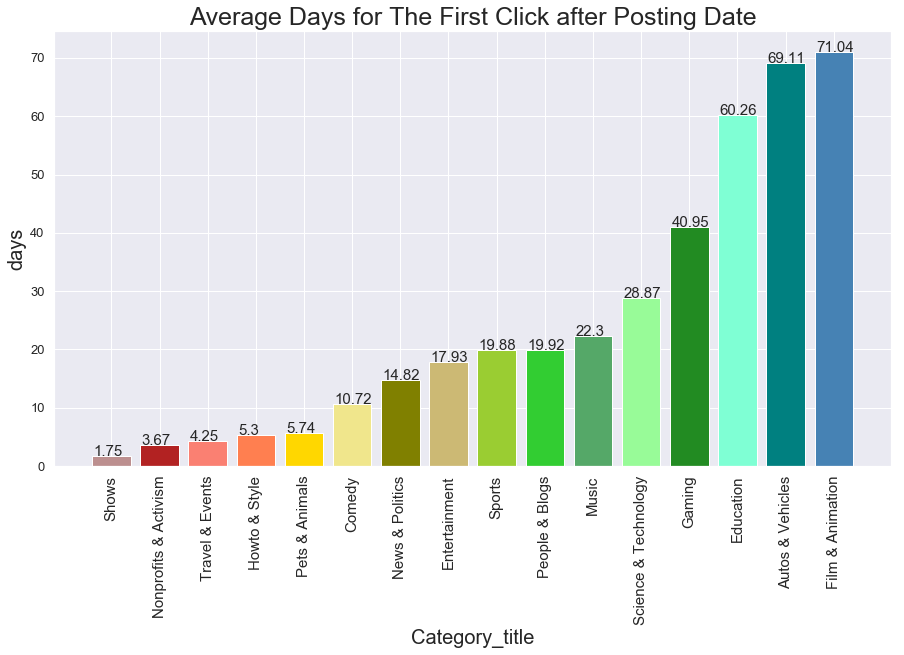

In [100]:
import math
fig,ax=plt.subplots(figsize=(15,8))
color=['rosybrown','firebrick','salmon','coral','gold','khaki','olive','y','yellowgreen','limegreen','g','palegreen',
    'forestgreen','aquamarine','teal','steelblue']
ax.bar(result.index,result,color=color)
scores=[]
for i in ax.patches:
    ax.text(i.get_x()+0.03,i.get_height(),str(round(i.get_height(),2)),fontsize=15)
ax.set_xticklabels(result.index,rotation=90,fontsize=15)
ax.set_xlabel('Category_title',fontsize=20)
ax.set_ylabel('days',fontsize=20)
ax.set_yticklabels(np.arange(0,81,10),fontsize=13)
ax.set_title('Average Days for The First Click after Posting Date',fontsize=25)

In [101]:
test2=test.pivot_table(['views','likes','dislikes','comment_count'],index='category_title')
for i in range(4):
    test2.iloc[:,i]=test2.iloc[:,i]/test2.iloc[:,i].sum()*100 # each column normalized to 100 %
test2=round(test2,3)
test2

,comment_count,dislikes,likes,views
category_title,,,,
Autos & Vehicles,0.300,0.236,0.205,0.817
Comedy,7.272,5.501,8.503,6.191
Education,1.602,0.988,1.565,1.239
Entertainment,24.143,34.358,19.005,22.686
Film & Animation,4.763,3.493,4.736,6.441
Gaming,3.436,3.181,1.967,1.906
Howto & Style,7.049,3.608,5.822,4.438
Music,31.343,27.313,42.818,38.952
News & Politics,2.705,3.957,0.858,1.873


Text(0.5, 0, 'perceantage')

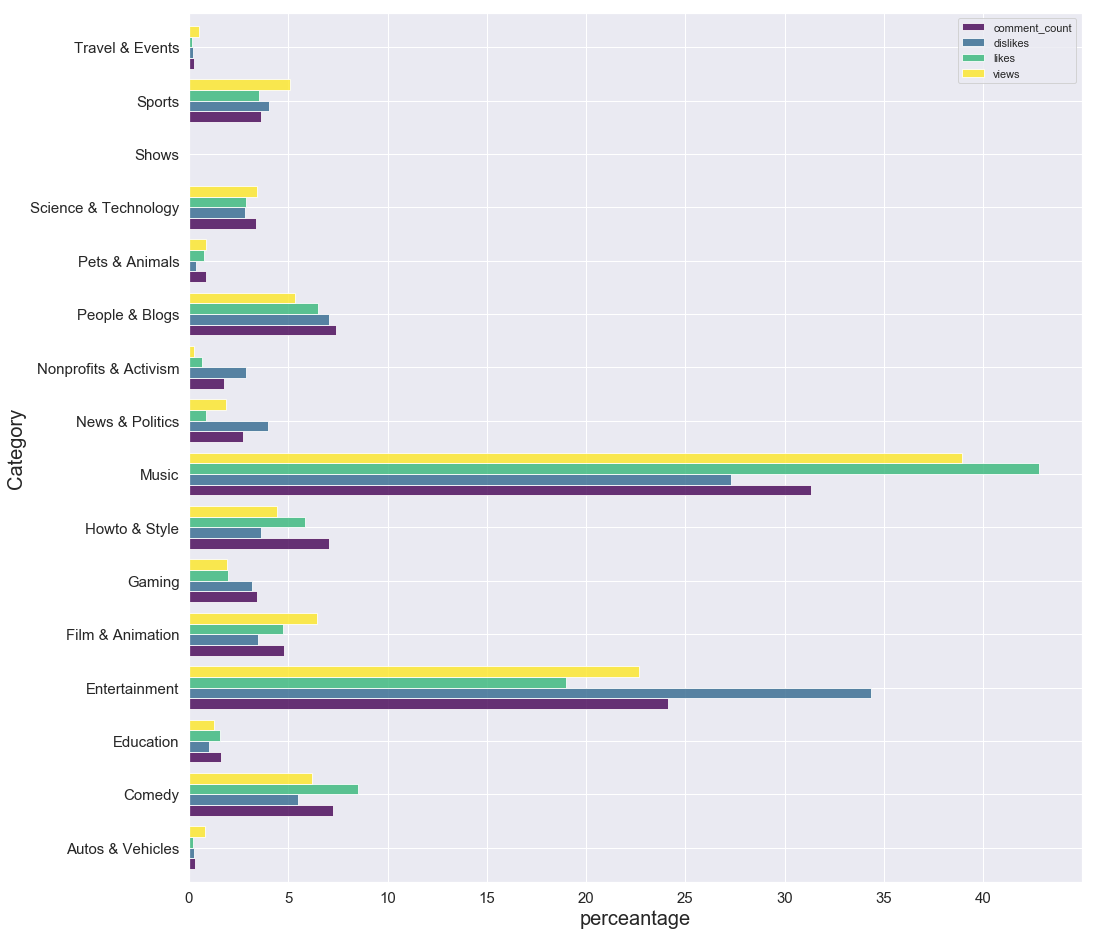

In [102]:
fig,ax=plt.subplots(figsize=(16,16))
test2.plot(kind='barh',ax=ax,cmap='viridis',width=0.8,alpha=0.8)
ax.set_yticklabels(test2.index,fontsize=15)
ax.set_ylabel('Category',fontsize=20)
ax.set_xticklabels(np.arange(0,41,5),fontsize=15)
ax.set_xlabel('perceantage',fontsize=20)


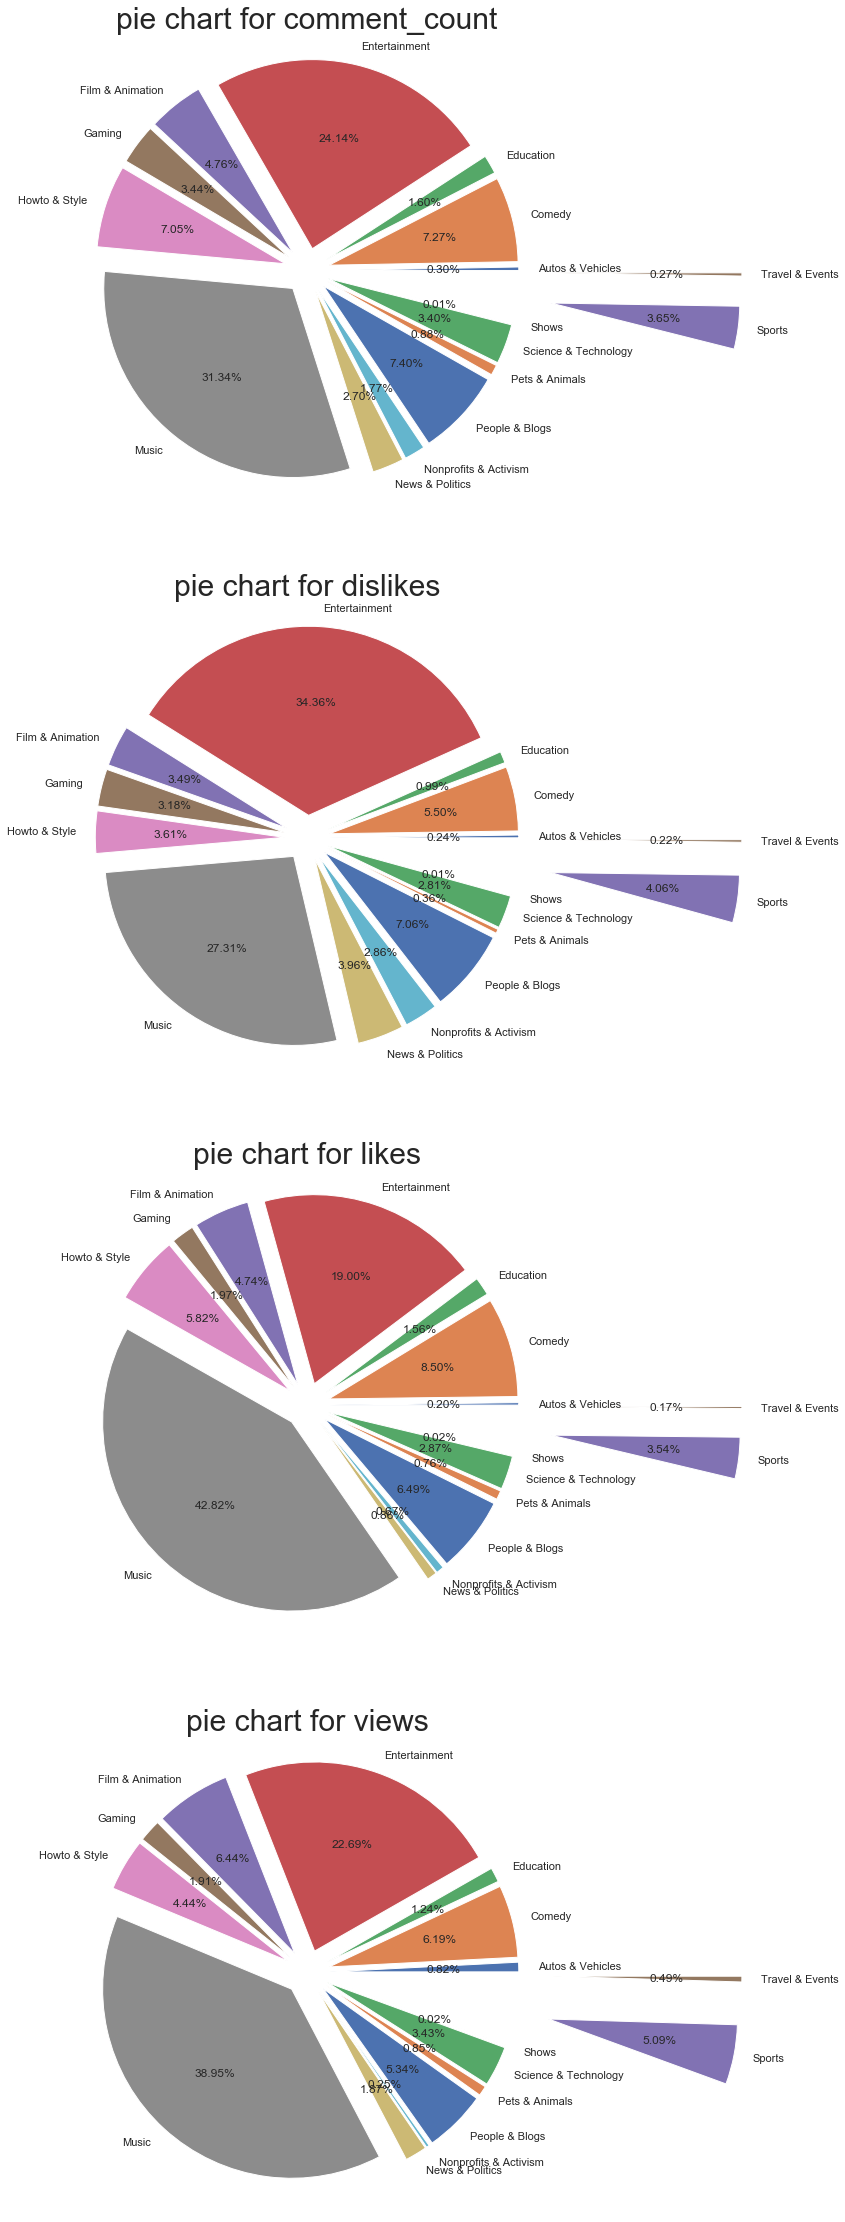

In [103]:
import itertools
title=test2.columns
labels=test2.index
explode1=[0.12 for i in range(0,len(labels)-2)]
explode2=[1.3 for i in range(len(labels)-2,len(labels))]
explode=list(itertools.chain.from_iterable([explode1,explode2]))
fig,axes=plt.subplots(4,1,figsize=(40,40))
for i,ax in enumerate(axes.flatten()): #axes.flatten() starting from 0 to 3
    ax.pie(test2.iloc[:,i],autopct='%.2f%%',labels=labels,explode=explode)
    ax.set_title('pie chart for {0}'.format(title[i]),fontsize=30)
plt.show()



```sql
WITH modifying_data AS(
    SELECT title,
           CASE WHEN CAST(trending_date AS DATE)-CAST(SUBSTRING(publish_time,1,10) AS DATE)<=28 THEN
           CAST(trending_date AS DATE)-CAST(SUBSTRING(publish_time,1,10) AS DATE) END AS consistency,
           view,
           comment_count,
           category_title
           FROM youtube),
     groupby_title AS(
     SELECT title,
            MAX(consistency) AS consistency,
            MAX(view) AS view,
            MAX(comment_count) AS comment_count,
            category_title
            FROM modifying_data
            WHERE consistency IS NOT NULL
            GROUP BY title,category_title),
      numeric_range(init,ends,score) AS(
          VALUES(0,4,1),
                (5,9,2),
                (10,14,3),
                (15,19,4),
                (20,24,5)),
       analysis_statics AS(
       SELECT g.title, 
              g.category_title,
              CASE WHEN g.consistency>=i.init OR g.consistency<=i.ends THEN i.score END AS consistency_score,
              ntile(5) OVER(ORDER BY comment_count) AS comment_score,
              ntile(5) OVER(ORDER BY view) AS view_score
              FROM groupby_title AS g
                   CROSS JOIN numeric_range AS i)
       SELECT * FROM analysis_statics;

```   

In [104]:
test2=pd.read_csv(r'C:\Users\DAVID SEO\Desktop\data_practice\youtube\test_result2.csv')
test2=test2.drop('title',axis=1)
test2=test2.set_index('category_title')
test2.head()

,consistency_score,comment_score,view_score
category_title,,,
News & Politics,2,1,1
News & Politics,3,1,1
News & Politics,5,1,1
News & Politics,9,1,1
News & Politics,7,1,1


```sql

WITH modifying_data AS(
    refer to the previous code),
     groupby_title AS(
     refer to the previous code,
      ),
       analysis_statics AS(
       refer to the previous code)
       SELECT CONCAT('view_',view_score) AS view_index,
              COUNT(CASE WHEN consistency=1 THEN 1  END ) AS consistency_1,
              COUNT(CASE WHEN consistency=2 THEN 1 END ) AS consistency_2,
              COUNT(CASE WHEN consistency=3 THEN 1 END ) AS consistency_3,
              COUNT(CASE WHEN consistency=4 THEN 1 END ) AS consistency_4,
              COUNT(CASE WHEN consistency=5 THEN 1 END ) AS consistency_5
              FROM analysis_statics 
              GROUP BY view_score
              ORDER BY view_index DESC;  
```

In [112]:
test4=pd.read_csv(r'C:\Users\DAVID SEO\Desktop\data_practice\youtube\view_consistency.csv')
test5=pd.read_csv(r'C:\Users\DAVID SEO\Desktop\data_practice\youtube\consistency_comment.csv')
test6=pd.read_csv(r'C:\Users\DAVID SEO\Desktop\data_practice\youtube\view_comment.csv')
display(test4)
display('-'*100)
display(test5)
display('-'*100)
display(test6)

,view_index,consistency_1,consistency_2,consistency_3,consistency_4,consistency_5
0,view_5,1273,1274,1274,1273,1274
1,view_4,1274,1273,1273,1275,1273
2,view_3,1274,1274,1274,1273,1273
3,view_2,1274,1274,1273,1273,1274
4,view_1,1273,1273,1274,1274,1274


'----------------------------------------------------------------------------------------------------'

,comment_index,consistency_1,consistency_2,consistency_3,consistency_4,consistency_5
0,5,1274,1273,1274,1273,1274
1,4,1273,1275,1273,1274,1273
2,3,1274,1272,1274,1274,1274
3,2,1273,1276,1273,1273,1273
4,1,1274,1272,1274,1274,1274


'----------------------------------------------------------------------------------------------------'

,view_index,comment_1,comment_2,comment_3,comment_4,comment_5
0,5,180,140,365,1315,4368
1,4,180,448,1412,2633,1695
2,3,259,1615,2375,1859,260
3,2,1165,2713,1920,525,45
4,1,4584,1452,296,36,0


Different combination of view-consistency suggests that each slot has relatively the same number. This does not give an insight on any behvabiors of users. Look at the diagonal from the top of right to the bottom of left, suggesting that there is a some level of relationship between two variables those clips who get more views are more likely for their viers to leave some comments. 
